In [1]:
import pandas as pd

### Load Resume

In [2]:
resume = pd.read_csv("Resume.csv")
resume.shape

(2484, 4)

In [3]:
resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
resume['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [5]:
top_categories = resume['Category'].value_counts().head(5).index.tolist()
top_categories

['INFORMATION-TECHNOLOGY',
 'BUSINESS-DEVELOPMENT',
 'FINANCE',
 'ADVOCATE',
 'ACCOUNTANT']

In [6]:
selected_resume = resume[resume['Category'].isin(top_categories)]
selected_resume.shape

(594, 4)

### Load JD

In [7]:
jd = pd.read_csv("jd.csv")

In [8]:
jd.head()

,category,title,company,description
0,information-technology,Systems Administrator,Delphon,About the job\n\n\nWe are seeking a skilled Sy...
1,information-technology,Head of Digital Technology,Transcendental,About the job\nTranscendental is looking for a...
2,information-technology,Information Technology Technian,Bishop-Wisecarver,"About the job\nAbout BW\n\nFor over 70 years, ..."
3,information-technology,Information Technology Support Technian,Grassland Dairy Products,"About the job\nGrassland Dairy Products, Inc. ..."
4,information-technology,Information Technology Intern,Newmark,About the job\nJob Description\n\nOur customiz...


### Preprocess - Resume

In [9]:
!pip install nltk

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)       # Remove html
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove numbers and punctuation
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

selected_resume['clean_resume'] = selected_resume['Resume_str'].apply(clean_text)
selected_resume = selected_resume[selected_resume['clean_resume'].str.len() > 50]  # remove resume that have short texts


ModuleNotFoundError: No module named 'nltk'

### Preprocess - JD

In [12]:
jd['clean_jd'] = jd['description'].astype(str).apply(clean_text)

jd = jd[jd['clean_jd'].str.len() > 50]


# Resume Categorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
selected_resume.shape

(593, 5)

In [15]:
selected_resume.head(5)

,ID,Resume_str,Resume_html,Category,clean_resume
217,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology summary dedicated infor...
218,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology specialist experience c...
219,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology supervisor summary seek...
220,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology instructor summary seve...
221,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology manageranalyst professi...


In [15]:
jd.head(5)

,category,title,company,description,clean_jd
0,information-technology,Systems Administrator,Delphon,About the job\n\n\nWe are seeking a skilled Sy...,job seeking skilled system administrator join ...
1,information-technology,Head of Digital Technology,Transcendental,About the job\nTranscendental is looking for a...,job transcendental looking highly motivated he...
2,information-technology,Information Technology Technian,Bishop-Wisecarver,"About the job\nAbout BW\n\nFor over 70 years, ...",job year bishopwisecarver wbenc certified woma...
3,information-technology,Information Technology Support Technian,Grassland Dairy Products,"About the job\nGrassland Dairy Products, Inc. ...",job grassland dairy product inc seeking enthus...
4,information-technology,Information Technology Intern,Newmark,About the job\nJob Description\n\nOur customiz...,job job description customized week program de...


### Generate category keywords based on job description dataset.

In [16]:
!pip install pandas numpy sentence-transformers scikit-learn tqdm

  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-macosx_10_12_x86_64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_10_12_x86_64.whl.metadata (3.8 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
Using cached safetensors-0.5.3-cp38-abi3-macosx_10_12_x86_64.whl (436 kB)
Using cached tokenizers-0.21.1-cp39-abi3-macosx_10_12_x86_64.whl (2.8 MB)


In [17]:
jd_df = jd.copy()
resume_df = selected_resume.copy()
resume_df['Category'] = resume_df['Category'].str.lower().str.strip()
jd_df['category'] = jd_df['category'].str.lower().str.strip()

In [18]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

# Sample format assumption
# resume_df.columns = ['ID', 'Resume_str', 'Resume_html', 'Category', 'clean_resume']
# jd_df.columns = ['category', 'title', 'company', 'description', 'clean_jd']

# Initialize the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight and fast

# Step 1: Generate keywords dynamically per category using JDs
def extract_top_keywords(jd_texts, top_n=20):
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform(jd_texts)
    keywords = vectorizer.get_feature_names_out()
    return list(keywords)

# Create a dictionary: {category -> [top keywords]}
category_keywords = {}
for category in jd_df['category'].unique():
    jd_texts = jd_df[jd_df['category'] == category]['clean_jd'].tolist()
    if jd_texts:
        keywords = extract_top_keywords(jd_texts, top_n=30)
        category_keywords[category] = keywords

# Step 2: Compute semantic similarity + keyword matching
def compute_semantic_similarity(resume_text, jd_texts):
    resume_embedding = model.encode(resume_text, convert_to_tensor=True)
    jd_embeddings = model.encode(jd_texts, convert_to_tensor=True)
    scores = util.cos_sim(resume_embedding, jd_embeddings)[0]
    return float(scores.max()), float(scores.mean())

def compute_keyword_score(resume_text, keyword_list):
    resume_text_lower = resume_text.lower()
    matched = [kw for kw in keyword_list if kw.lower() in resume_text_lower]
    return len(matched) / len(keyword_list) if keyword_list else 0

# Step 3: Resume-JD scoring loop
results = []

for idx, row in tqdm(resume_df.iterrows(), total=len(resume_df)):
    resume_id = row['ID']
    resume_text = row['clean_resume']
    category = row['Category']

    # Get matching JDs for same category
    jd_texts = jd_df[jd_df['category'] == category]['clean_jd'].tolist()
    keyword_list = category_keywords.get(category, [])

    if not jd_texts:
        max_sim, avg_sim, keyword_score = 0, 0, 0
    else:
        max_sim, avg_sim = compute_semantic_similarity(resume_text, jd_texts)
        keyword_score = compute_keyword_score(resume_text, keyword_list)

    results.append({
        'ID': resume_id,
        'Category': category,
        'Max_Similarity': max_sim,
        'Avg_Similarity': avg_sim,
        'Keyword_Score': keyword_score
    })

scores_df = pd.DataFrame(results)

# Step 4: Normalize and label
scaler = MinMaxScaler()
scores_df[['Max_Similarity', 'Avg_Similarity', 'Keyword_Score']] = scaler.fit_transform(
    scores_df[['Max_Similarity', 'Avg_Similarity', 'Keyword_Score']]
)

# Combine into final score (weights can be adjusted)
scores_df['Final_Score'] = (
    0.6 * scores_df['Max_Similarity'] +
    0.2 * scores_df['Avg_Similarity'] +
    0.2 * scores_df['Keyword_Score']
)

# Assign label based on score
def assign_label(score):
    if score >= 0.75:
        return 'good'
    elif score >= 0.5:
        return 'average'
    else:
        return 'bad'

scores_df['Label'] = scores_df['Final_Score'].apply(assign_label)

# Merge back to resumes
resume_labeled_df = resume_df.merge(scores_df[['ID', 'Final_Score', 'Label']], on='ID')

# Preview result
print(resume_labeled_df[['ID', 'Category', 'Final_Score', 'Label']].head())

resume_labeled_df.to_csv('resume_labeled_df.csv', index = False)

100%|██████████| 593/593 [04:56<00:00,  2.00it/s]


         ID                Category  Final_Score    Label
0  36856210  information-technology     0.784677     good
1  21780877  information-technology     0.726071  average
2  33241454  information-technology     0.712692  average
3  25990239  information-technology     0.471942      bad
4  16899268  information-technology     0.659699  average


In [19]:
resume_labeled_df.head(5)

,ID,Resume_str,Resume_html,Category,clean_resume,Final_Score,Label
0,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",information-technology,information technology summary dedicated infor...,0.784677,good
1,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",information-technology,information technology specialist experience c...,0.726071,average
2,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",information-technology,information technology supervisor summary seek...,0.712692,average
3,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",information-technology,information technology instructor summary seve...,0.471942,bad
4,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",information-technology,information technology manageranalyst professi...,0.659699,average


### Topic Modeling 

In [26]:
resume_labeled_df = pd.read_csv("resume_labeled_df.csv")
top_categories_filter = resume_labeled_df['Category'].value_counts().head(5).index.tolist()
top_categories_filter

['information-technology',
 'business-development',
 'advocate',
 'finance',
 'accountant']

In [6]:
pip install nltk scikit-learn matplotlib wordcloud 


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Category: information-technology

 Good Resumes:


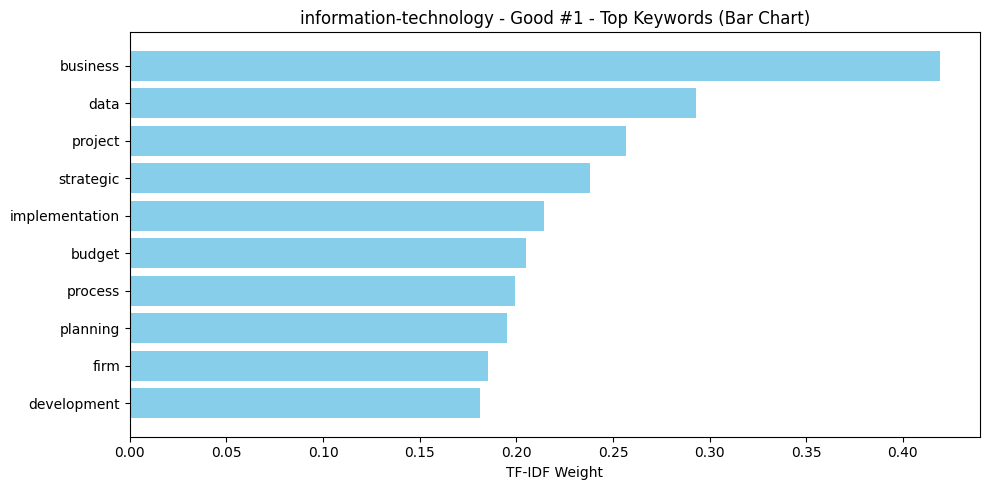

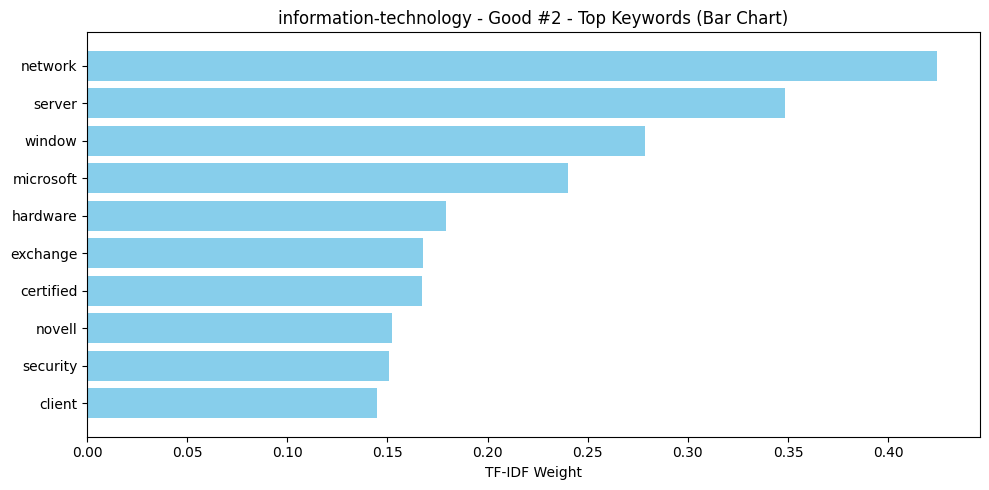

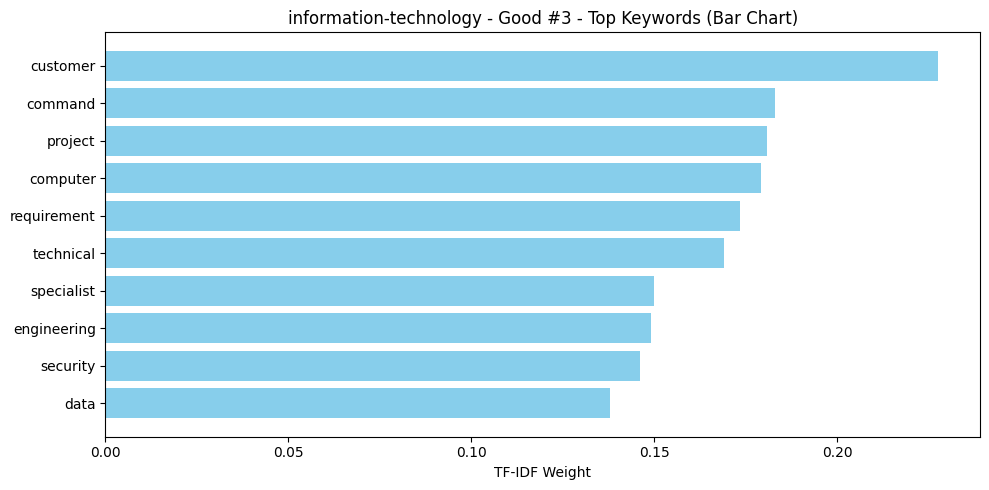

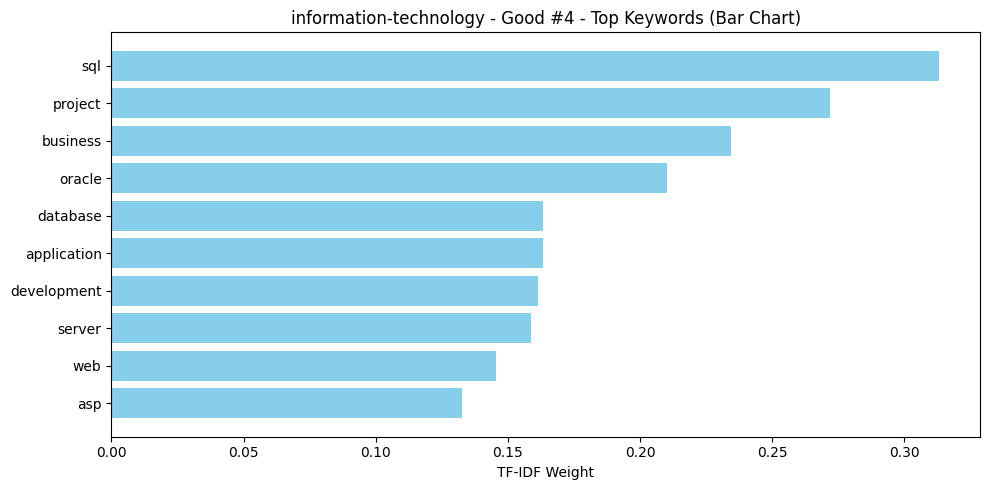


 Bad Resumes:


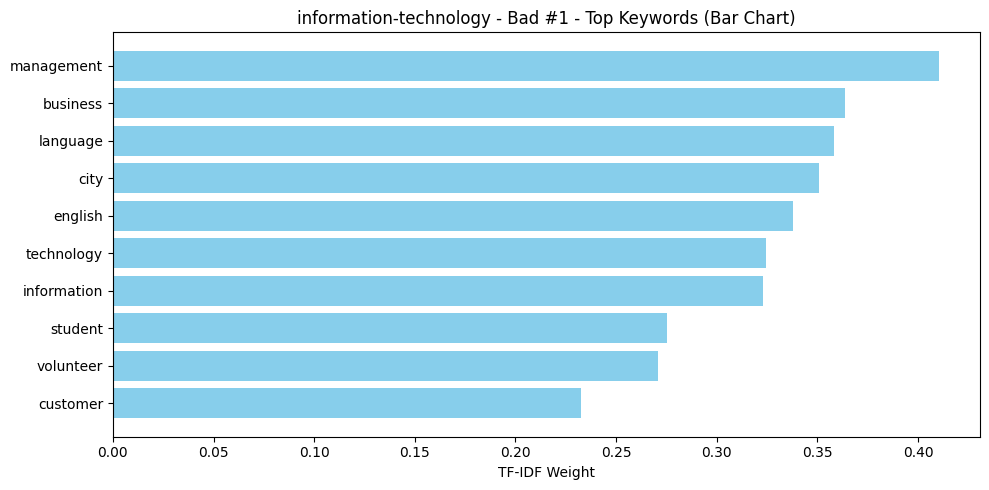

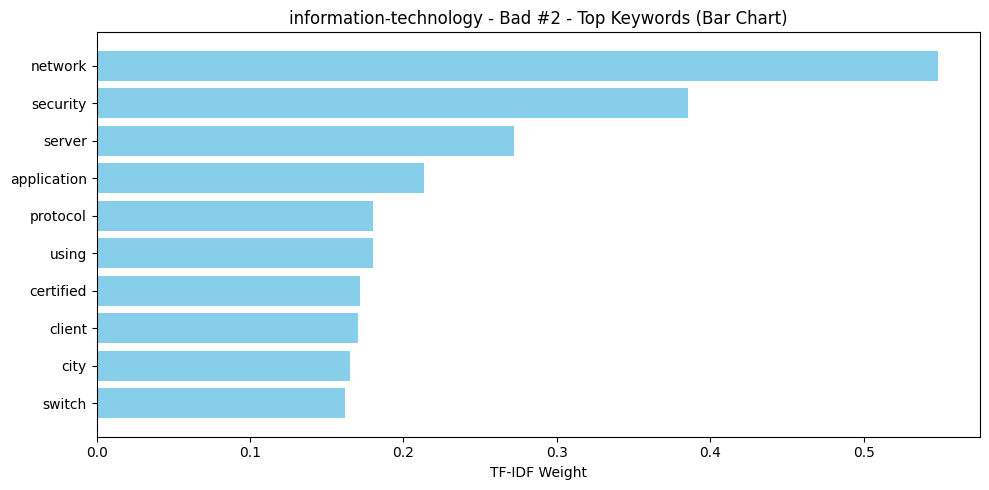

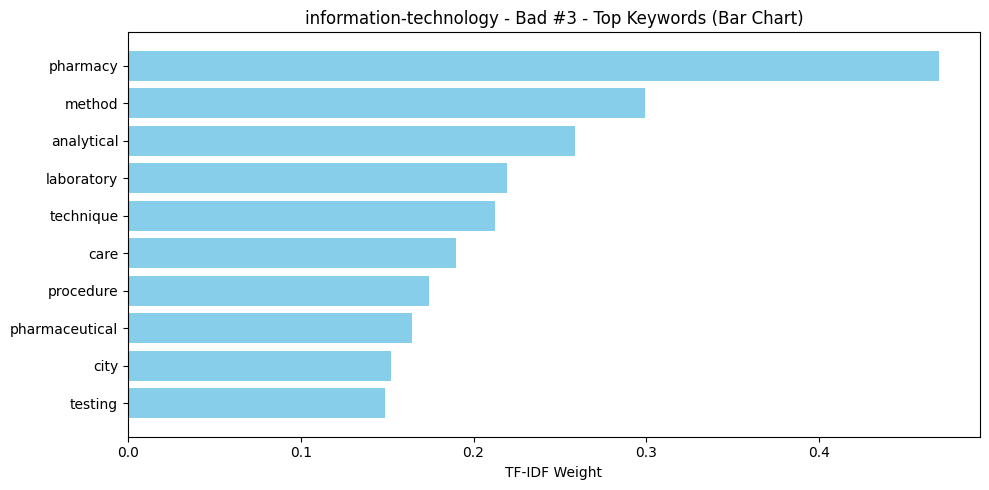

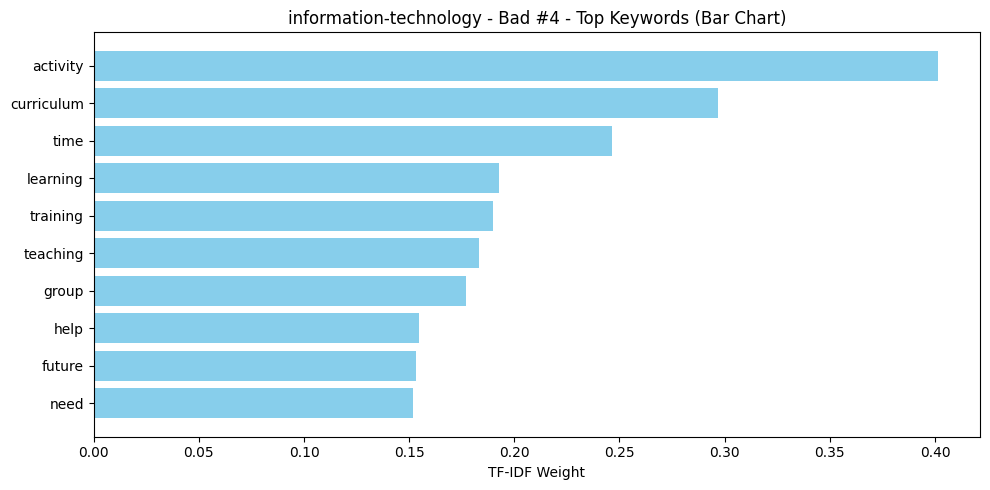

Category: business-development

 Good Resumes:


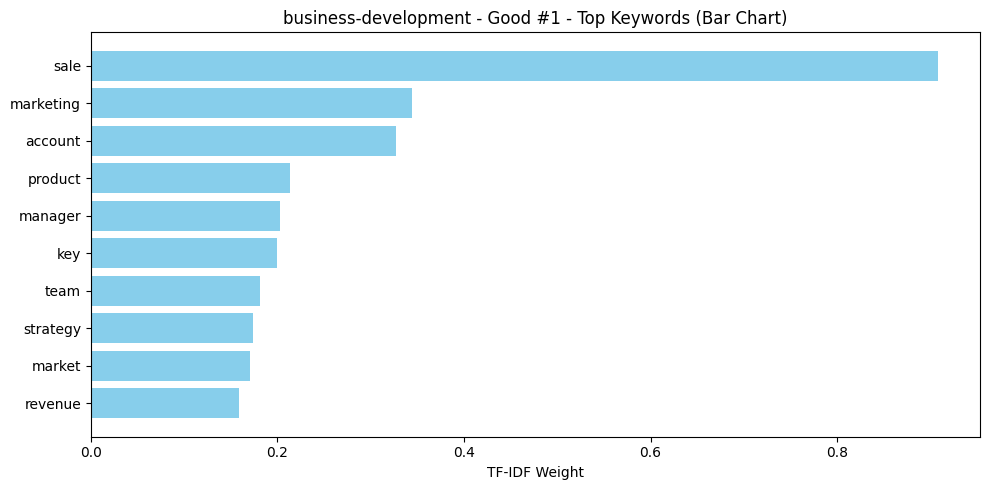

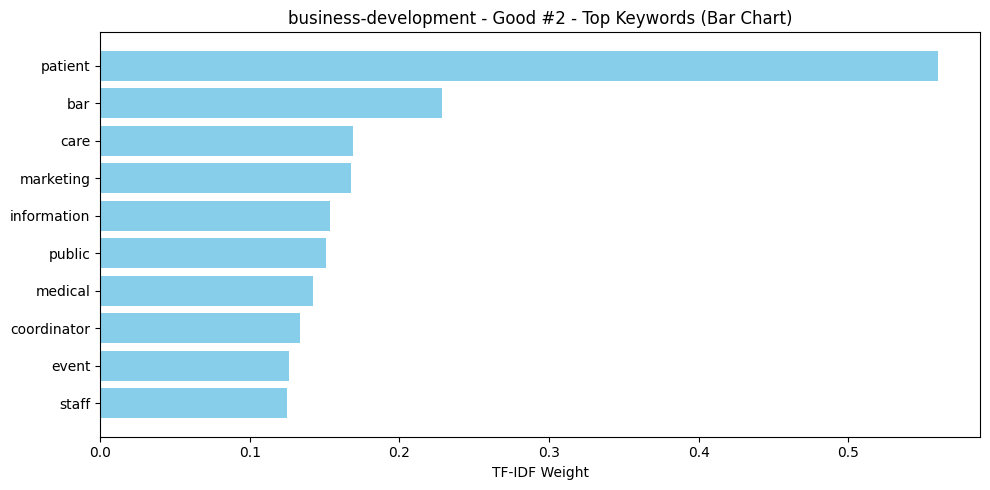

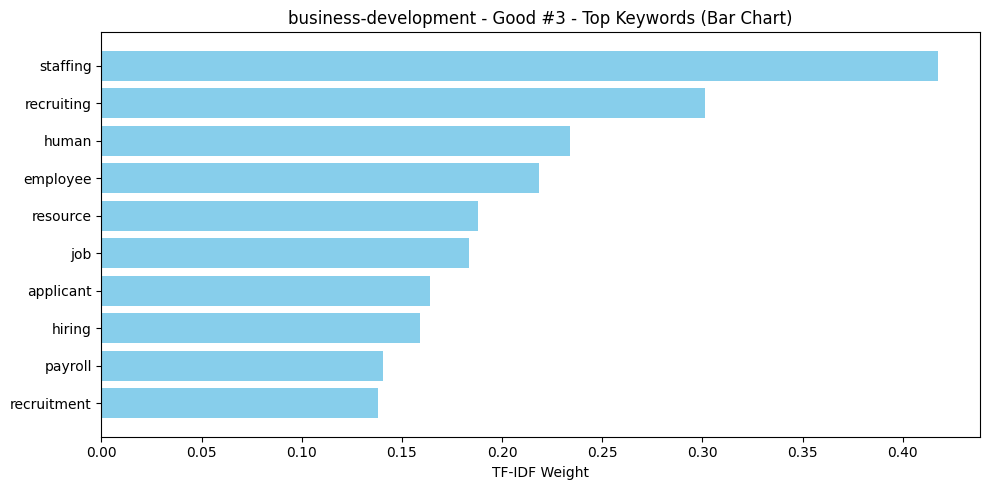

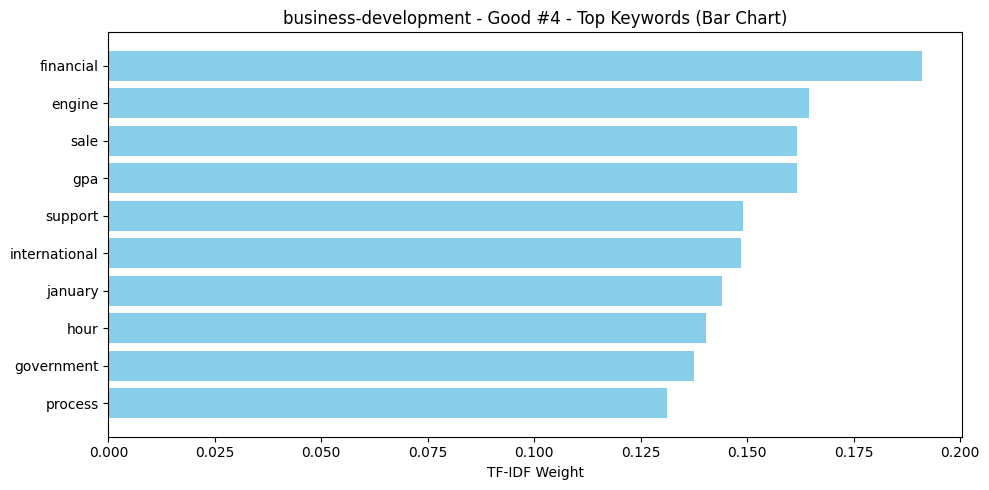


 Bad Resumes:


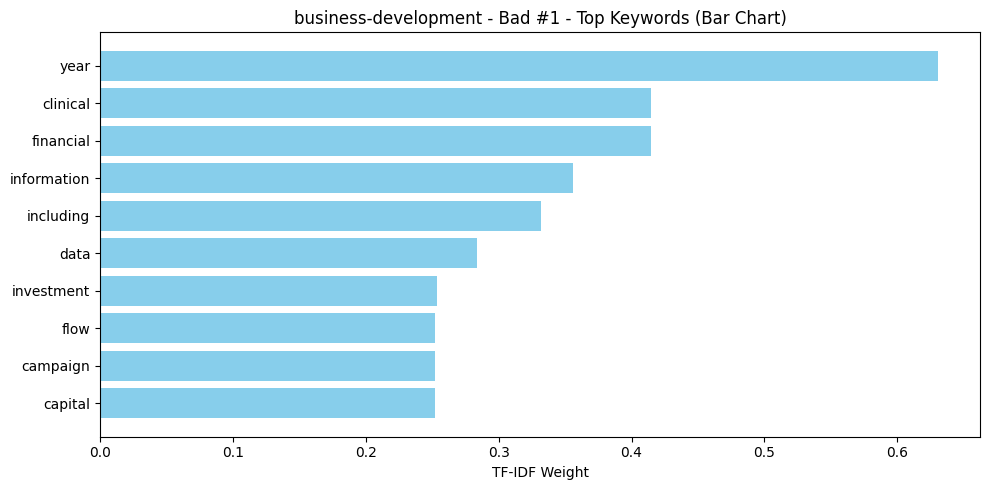

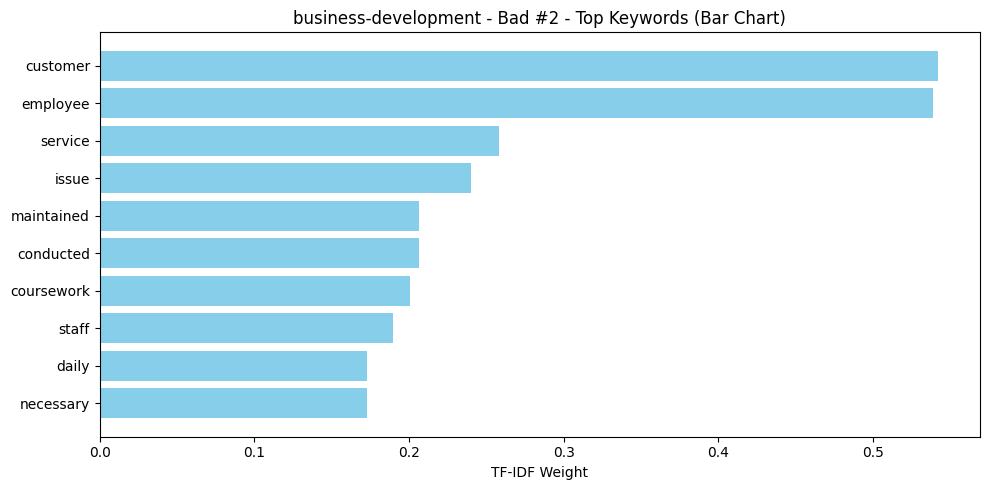

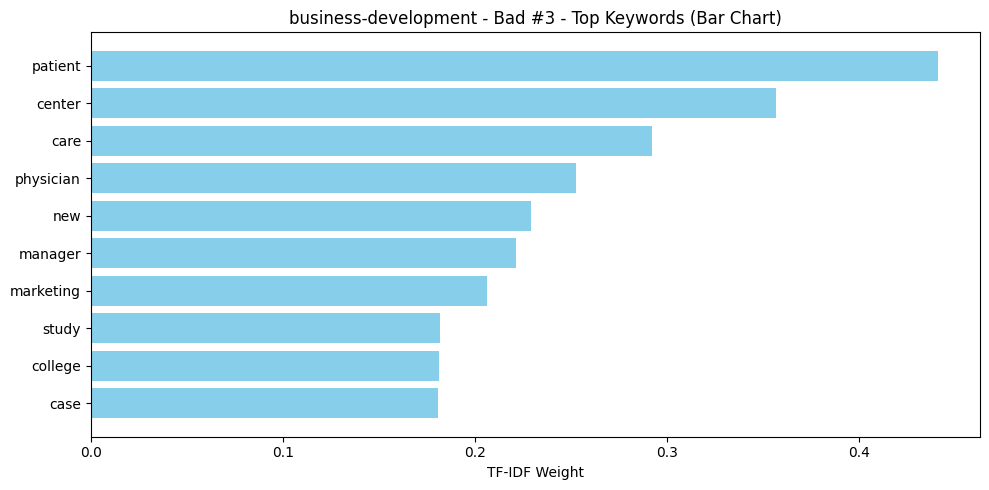

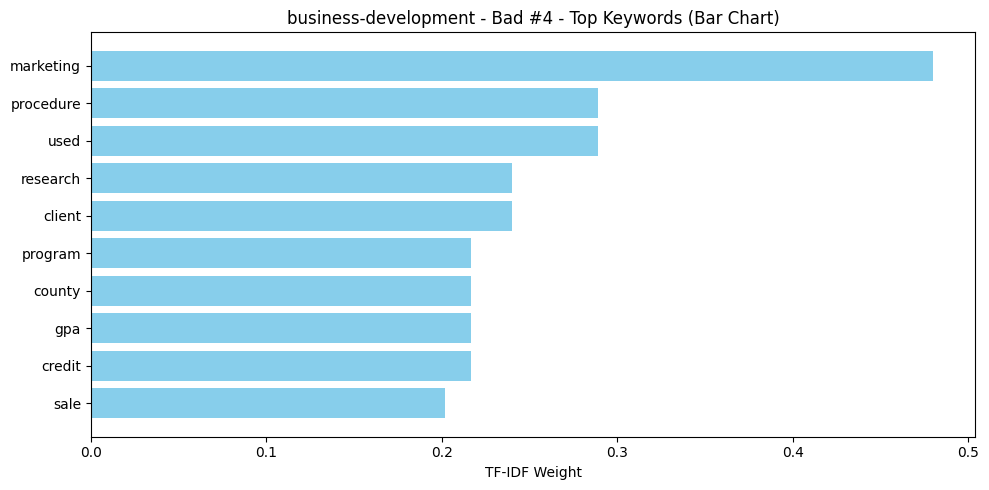

Category: advocate

 Good Resumes:
There's no good resumes.

 Bad Resumes:


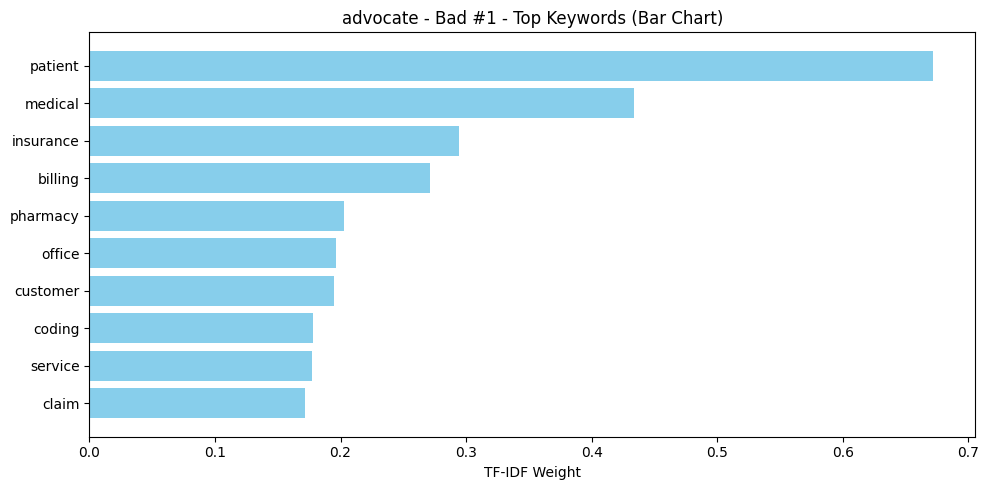

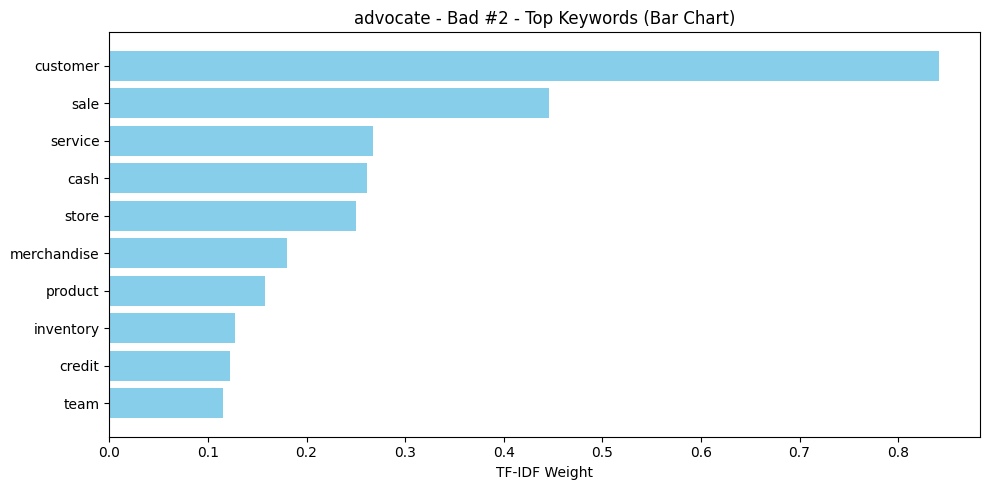

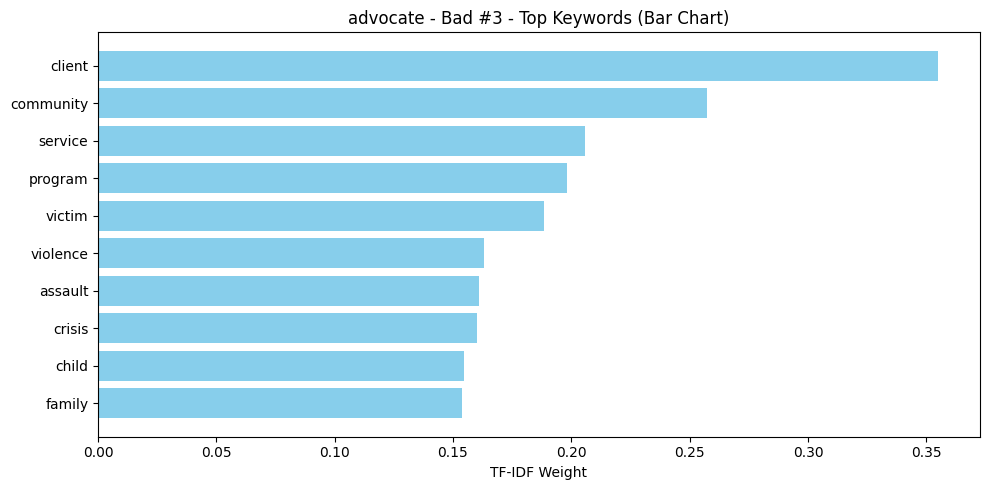

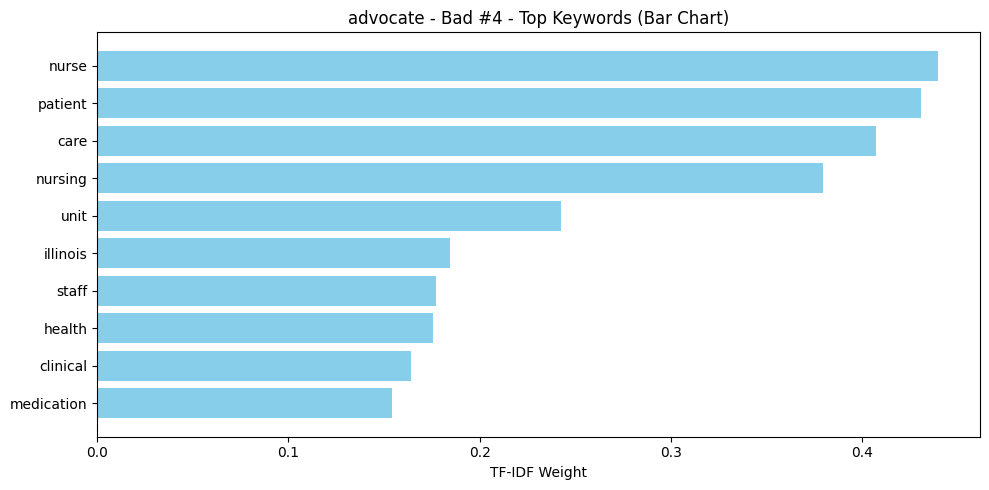

Category: finance

 Good Resumes:
There's no good resumes.

 Bad Resumes:


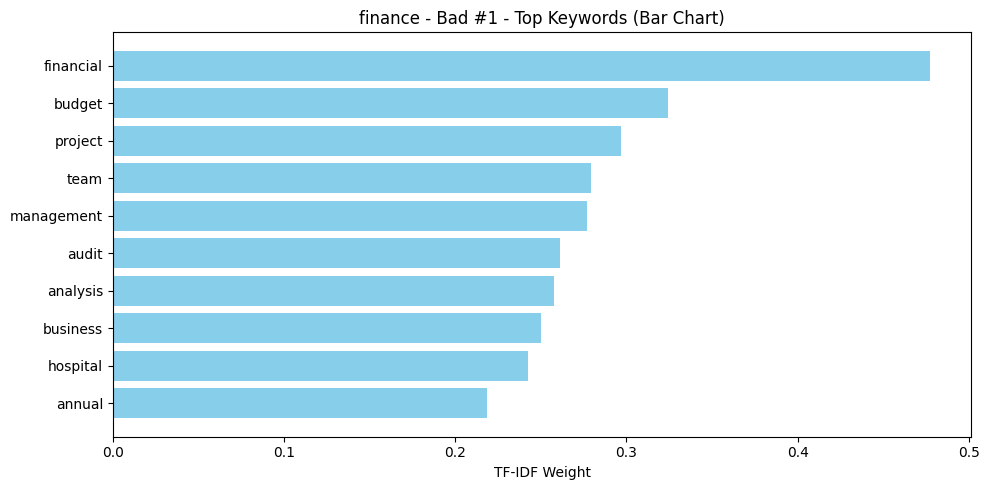

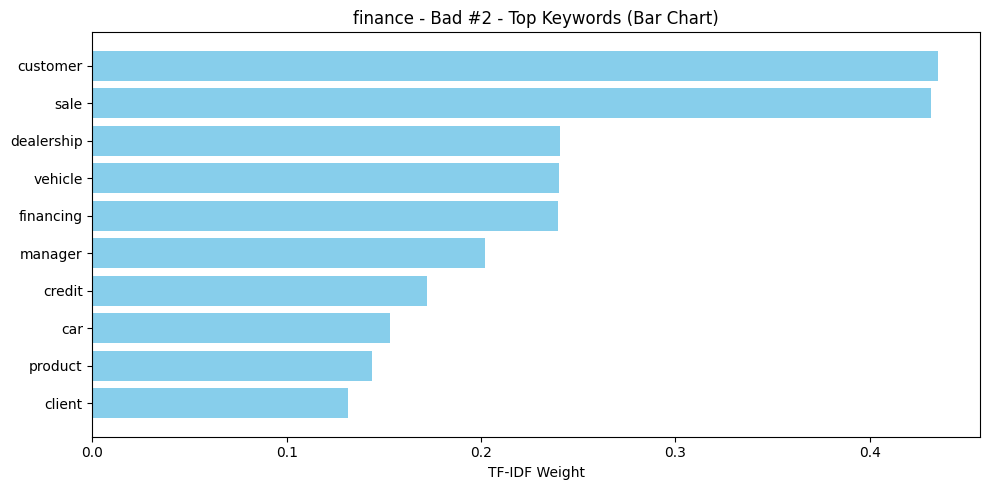

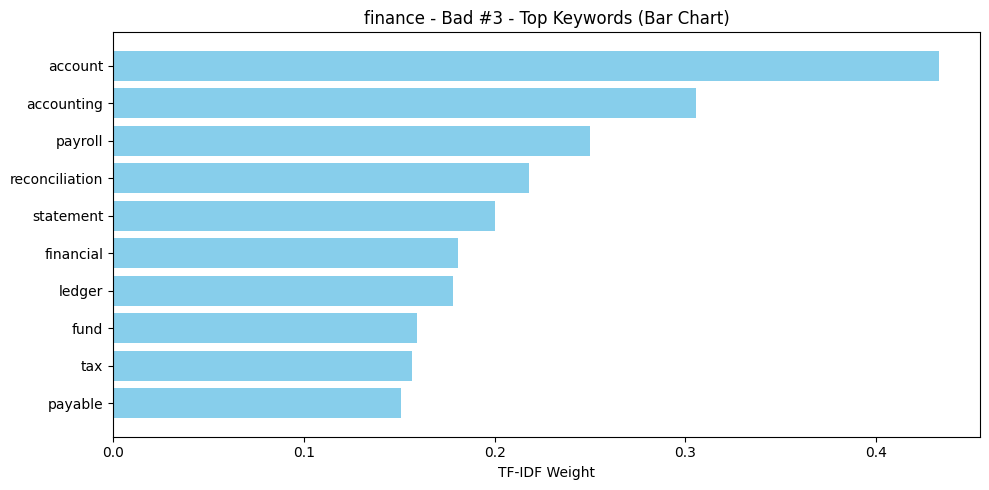

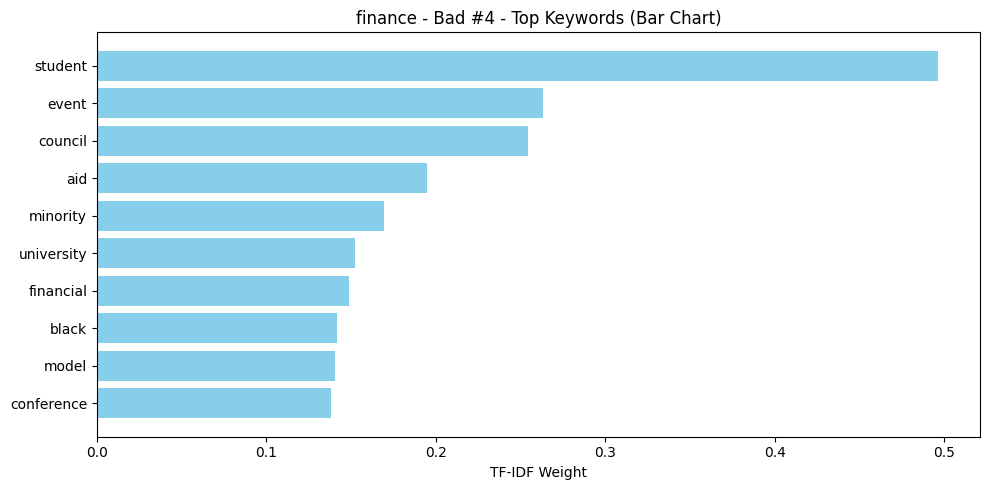

Category: accountant

 Good Resumes:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


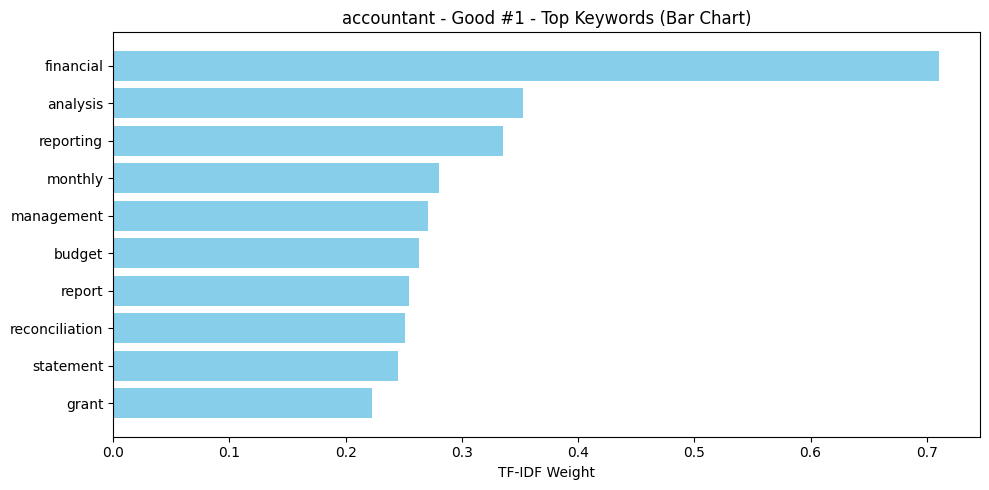

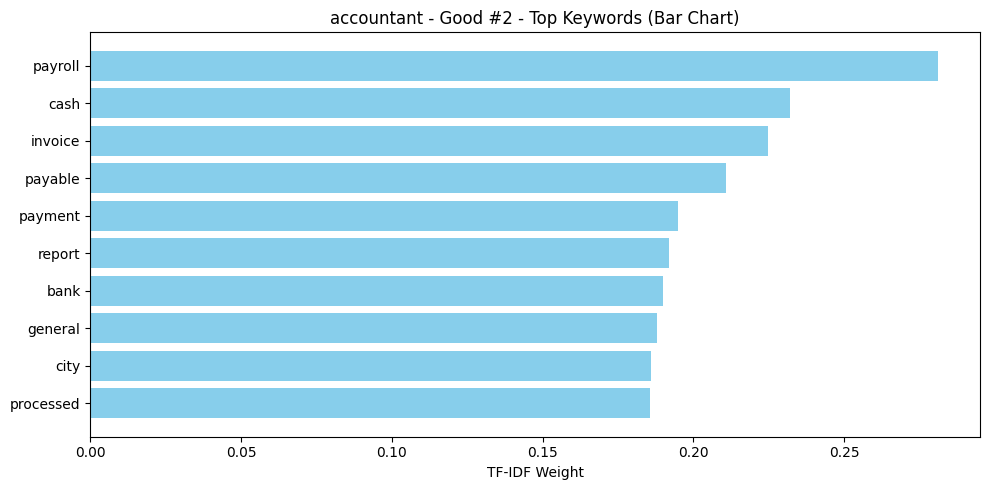

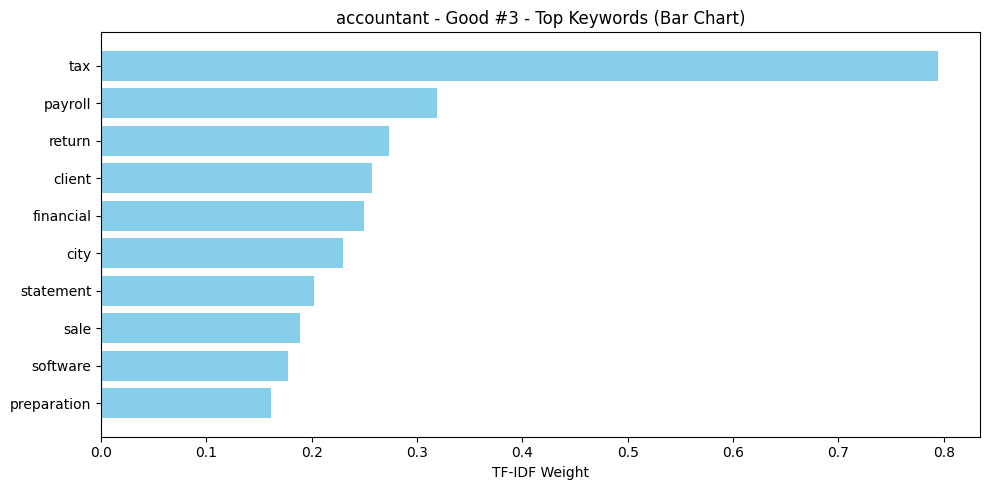

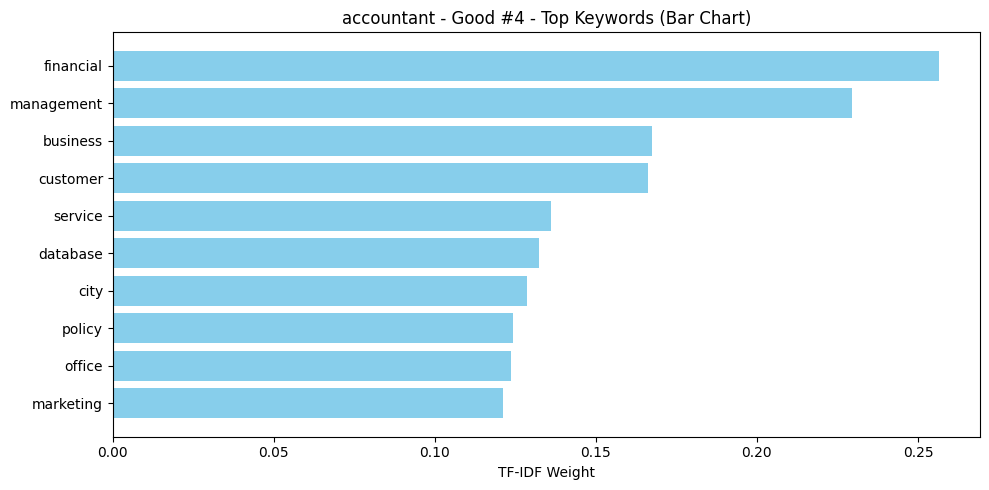


 Bad Resumes:
Skipping accountant - Bad: too few documents (1)


In [28]:
#Create Document-Term Matrix & Train the Topic Model & Visualize with Word Clouds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
categories=resume_labeled_df['Category'].unique()
def topic_modeling_by_group(texts, n_topics=4, n_words=10, title_prefix="Topic"):

    texts = texts.dropna()
    texts = texts[texts.str.strip().astype(bool)]
    if len(texts) < 2:
        print(f"Skipping {title_prefix}: too few documents ({len(texts)})")
        return
    
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term = vectorizer.fit_transform(texts)
    
    model = NMF(n_components=n_topics, random_state=42)
    model.fit(doc_term)

    feature_names = vectorizer.get_feature_names_out() # abstract keywords
    for idx, topic in enumerate(model.components_):
        word_weights = {
            feature_names[i]: topic[i]
            for i in topic.argsort()[:-n_words - 1:-1]
        }
        # Word Cloud 
        ''' wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{title_prefix} #{idx + 1}", fontsize=16)
        plt.show()'''

        #Bar Chart
        words = list(word_weights.keys())
        weights = list(word_weights.values())

        plt.figure(figsize=(10, 5))
        plt.barh(words[::-1], weights[::-1], color='skyblue')  # reverse for top-down order
        plt.xlabel("TF-IDF Weight")
        plt.title(f"{title_prefix} #{idx + 1} - Top Keywords (Bar Chart)")
        plt.tight_layout()
        plt.show()

# Topic Model for 5 categories
for cat in top_categories_filter:
    print(f"Category: {cat}")
    sub = resume_labeled_df[resume_labeled_df['Category'] == cat]
    print("\n Good Resumes:")

    if 'good' in sub['Label'].values:
        good_resumes = sub[sub['Label'] == 'good']['clean_resume']
        topic_modeling_by_group(good_resumes,title_prefix=f"{cat} - Good")
    else:
        print("There's no good resumes.")

    print("\n Bad Resumes:")
    if 'bad' in sub['Label'].values:
        bad_resumes = sub[sub['Label'] == 'bad']['clean_resume']
        topic_modeling_by_group(bad_resumes,title_prefix=f"{cat} - Bad")
    else:
        print("There's no bad resumes.")


